# Predicting Countries GDP


### Author : Jose Juan Peña Gomez

## Introduction

I was looking for various economic indicators, statistics of countries and I came across UNData Kaggle's dataset provided by Data Science for Good : Kiva Crowdfunding.

The United Nations Statistics Division (UNSD) of the Department of Economic and Social Affairs (DESA) launched a new internet based data service for the global user community. It brings UN statistical databases within easy reach of users through a single entry point (http://data.un.org/). Users can search and download a variety of statistical resources of the UN system.

    https://www.kaggle.com/sudalairajkumar/undata-country-profiles

This dataset contains the following key statistical indicators of the countries:

    1- General Information
    2- Economic Indicators
    3- Social Indicators
    4- Environmental & Infrastructure Indicators

The data is from 2017.

This dataset is composed by two files:

    1. Country_profile_variables.csv : contains the indicator variables of all the countries present in UNData.
    2. kiva_country_profile_variables.csv : contains the indicator variables of the countries present in the Kiva Crowdfunding dataset. (Apart from country Kosovo, all the other countries are present in UNData and hence it is in this dataset as well)
    
So finally I decided that the porpuse of this project is going to be about  building a machine learning model which will be able to predict the GDP of every country.

And as you tell me, and as I will explain you later I will use some data from The World Factbook of the Cia to set up the dataframe also.

        https://www.cia.gov/library/publications/download/
        
Also I found another dataset that can be used to predict GDP per capita, the ecomonic freedom, the Heritage Foundation calculate the economic freedom index since 1995.
        https://www.kaggle.com/isacscjr/heritage-freedom-index#index2018_data.xls

# Set up the project libraries

In this project we are going to use several tools as Numpy for mathematicals issues, Pandas for arrange the data, sklearn for the ML part and matplotlib for plotting the results.

In [1]:
# Import Section

from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import decomposition
from sklearn.feature_selection import SelectKBest,mutual_info_regression
from sklearn.model_selection import GridSearchCV


import seaborn as sns

In [2]:
from sklearn import decomposition
from sklearn.feature_selection import SelectKBest,mutual_info_regression

from sklearn.tree import DecisionTreeRegressor

Input data files are available in the "../input/" directory.

In [3]:
print(os.listdir("input/"))

['DataSet_V2.csv', 'heritage-freedom-index', 'country_profile_variables.csv']


# Get the data

For getting the data is necesary to first download the dataset from the webpage written before ( Kaggle ). Then I will set the variable df for work with a dataframe of the dataset for take a look.

In [4]:
df = pd.read_csv('input/country_profile_variables.csv')

# Explore the data

We can take a first look of the first rows of the dataframe with the function head.

We can observe that each row is a country and each country has 50 features that in this case mean 50 economics indicators.

In [5]:
df.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99


We can observe that there is not data null.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 50 columns):
country                                                       229 non-null object
Region                                                        229 non-null object
Surface area (km2)                                            229 non-null object
Population in thousands (2017)                                229 non-null int64
Population density (per km2, 2017)                            229 non-null float64
Sex ratio (m per 100 f, 2017)                                 229 non-null float64
GDP: Gross domestic product (million current US$)             229 non-null int64
GDP growth rate (annual %, const. 2005 prices)                229 non-null object
GDP per capita (current US$)                                  229 non-null float64
Economy: Agriculture (% of GVA)                               229 non-null object
Economy: Industry (% of GVA)                                  229 non-null

As we can see here that there is a colummn about GDP, but I am going to work with it later.

In [7]:
df[['country','GDP per capita (current US$)']]

,country,GDP per capita (current US$)
0,Afghanistan,623.2
1,Albania,3984.2
2,Algeria,4154.1
3,American Samoa,-99.0
4,Andorra,39896.4
5,Angola,4714.1
6,Anguilla,21879.6
7,Antigua and Barbuda,14764.5
8,Argentina,14564.5
9,Armenia,3489.1


Several histograms, in which are represented a cluster of the total amount of attributes for visualizing purposes and doing a small previous analysis of the dataset.

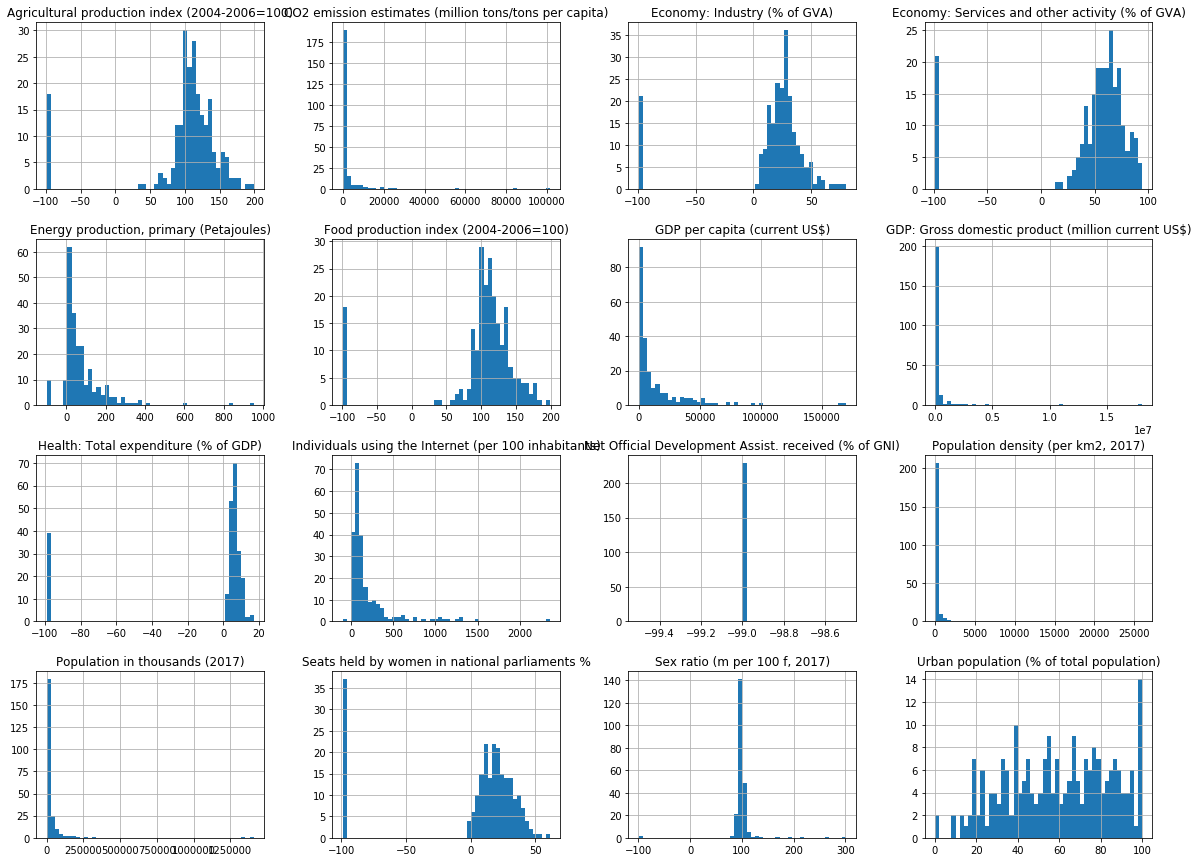

In [8]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

# Preparing the Dataset

As you told me it's a good idea to extend and prepare the dataset, therefore I am going to put manually data from The World FactBook of the CIA because the file provided by the CIA is very huge and take so much time to merge with the dataframe or even prepare it for be a datafram.

So I took some values that are missing or wrong and I put them in the dataset that I am working right now with an script generating another dataset from the original one. Then, I will continue working with the new one.

In [9]:
df = pd.read_csv('input/DataSet_V2.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 51 columns):
Unnamed: 0                                                    219 non-null int64
country                                                       219 non-null object
Region                                                        219 non-null object
Surface area (km2)                                            219 non-null int64
Population in thousands (2017)                                219 non-null int64
Population density (per km2, 2017)                            219 non-null float64
Sex ratio (m per 100 f, 2017)                                 219 non-null float64
GDP: Gross domestic product (million current US$)             219 non-null int64
GDP growth rate (annual %, const. 2005 prices)                219 non-null float64
GDP per capita (current US$)                                  219 non-null float64
Economy: Agriculture (% of GVA)                               219 non-null 

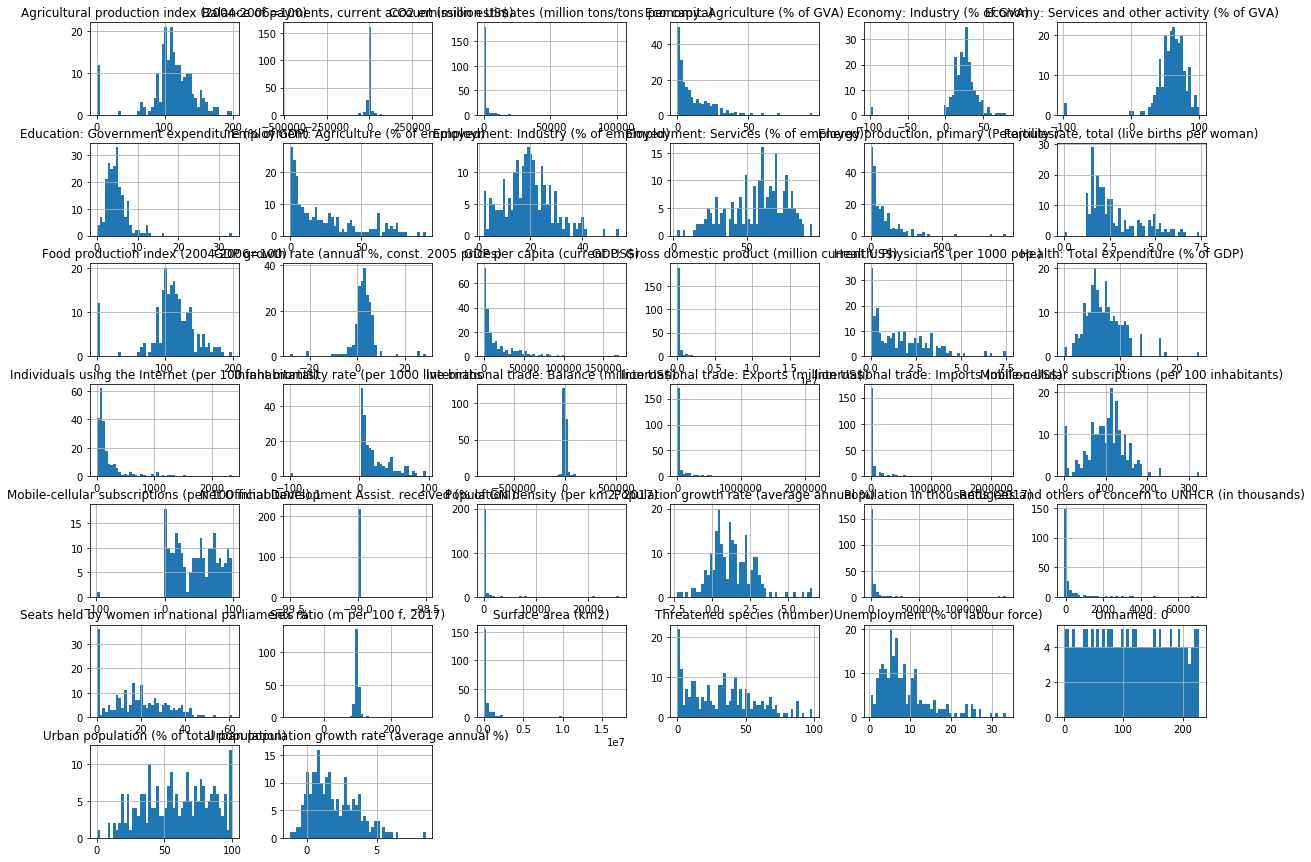

In [11]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

So as we can appreciate the data is getting less disprorpocionate, but still is not enought.

There are features with almost no data like the last columns, so I will drop them.

In [12]:
df.drop(df.columns[-3:], axis=1, inplace=True)
df.drop(columns=['Forested area (% of land area)'], inplace=True)
df = df.apply(pd.to_numeric, errors='ignore')


There is a categorical variable in the data set, "Region", let's transforme it for make easier the proccessing of the data.

In [13]:
region = pd.get_dummies(df['Region'])
region.head()

,Caribbean,CentralAmerica,CentralAsia,EasternAfrica,EasternAsia,EasternEurope,Melanesia,Micronesia,MiddleAfrica,NorthernAfrica,...,Oceania,Polynesia,South-easternAsia,SouthAmerica,SouthernAfrica,SouthernAsia,SouthernEurope,WesternAfrica,WesternAsia,WesternEurope
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Now let drop the original column and concatenate the two data frames into one.

In [14]:
df.drop(columns=['Region'], inplace=True)

In [15]:
df = pd.concat([df,region], axis=1)
df.head()

,Unnamed: 0,country,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Oceania,Polynesia,South-easternAsia,SouthAmerica,SouthernAfrica,SouthernAsia,SouthernEurope,WesternAfrica,WesternAsia,WesternEurope
0,0,Afghanistan,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,0,0,0,0,0,1,0,0,0,0
1,1,Albania,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,0,0,0,0,0,0,1,0,0,0
2,2,Algeria,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,0,0,0,0,0,0,0,0,0,0
3,3,American Samoa,199,56,278.2,103.6,658,-2.5,11200.0,27.4,...,0,1,0,0,0,0,0,0,0,0
4,4,Andorra,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,0,0,0,0,0,0,1,0,0,0


Now I will change the features that are splited in two but in the same features, like the following ones. 

In [16]:
df[['country','Life expectancy at birth (females/males, years)']].head()

,country,"Life expectancy at birth (females/males, years)"
0,Afghanistan,63.5/61.0
1,Albania,79.9/75.6
2,Algeria,76.5/74.1
3,American Samoa,77.8/71.1
4,Andorra,80.7/85.2


To do that I will split the feature into two.

In [17]:
life_exp = df['Life expectancy at birth (females/males, years)']
life_exp = life_exp.str.split("/", expand=True)
life_exp.columns = ['Life exp. Male','Life exp. Female']
life_exp.head()

,Life exp. Male,Life exp. Female
0,63.5,61.0
1,79.9,75.6
2,76.5,74.1
3,77.8,71.1
4,80.7,85.2


Then I will do the same with the rest of the features.

In [18]:
labour_force             = df['Labour force participation (female/male pop. %)']
labour_force             = labour_force.str.split("/", expand=True)
labour_force.columns     = ['Labour Force: Male','Labour Force: Female']

age_distribution         = df['Population age distribution (0-14 / 60+ years, %)']
age_distribution         = age_distribution.str.split("/", expand=True)
age_distribution.columns = ['Age dist.: Male','Age dist.: Female']

migrants                 = df['International migrant stock (000/% of total pop.)']
migrants                 = migrants.str.split("/", expand=True)
migrants.columns         = ["Migrants: Total","Migrants: % pop."]

edu_prim                 = df['Education: Primary gross enrol. ratio (f/m per 100 pop.)']
edu_prim                 = edu_prim.str.split("/", expand=True)
edu_prim.columns         = ['Primary Edu.Enroll: Female','Primary Edu. Enroll: Male']

edu_sec                  = df['Education: Secondary gross enrol. ratio (f/m per 100 pop.)']
edu_sec                  = edu_sec.str.split("/", expand=True)
edu_sec.columns          = ['Sec. Edu.Enroll: Female','Sec. Edu. Enroll: Male']

edu_ter                  = df['Education: Tertiary gross enrol. ratio (f/m per 100 pop.)']
edu_ter                  = edu_ter.str.split("/", expand=True)
edu_ter.columns          = ['Ter. Edu.Enroll: Female','Ter. Edu. Enroll: Male']

energy                   = df['Energy supply per capita (Gigajoules)']
energy                   = energy.str.split("/", expand=True)
energy.columns           = ['Energy Supply:Urban','Energy Supply:Rural']

For example if we check labour force we can see the process have beed done correctly.

In [19]:
labour_force.head()

,Labour Force: Male,Labour Force: Female
0,19.3,83.6
1,40.2,61.0
2,17.0,70.7
3,23.1,58.0
4,38.2,61.8


Then, let's drop the old ones.

In [20]:
df.drop(columns=['Life expectancy at birth (females/males, years)',
                'Labour force participation (female/male pop. %)',
                'Population age distribution (0-14 / 60+ years, %)',
                'International migrant stock (000/% of total pop.)',
                'Education: Primary gross enrol. ratio (f/m per 100 pop.)',
                'Education: Secondary gross enrol. ratio (f/m per 100 pop.)',
                'Education: Tertiary gross enrol. ratio (f/m per 100 pop.)',
                'Energy supply per capita (Gigajoules)'], inplace=True)

Then I have to join that new features with the dataframe.

In [21]:
df = pd.concat([df,labour_force,age_distribution,migrants,edu_prim,edu_sec,edu_ter,energy], axis=1)

In [22]:
df.head()

,Unnamed: 0,country,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Migrants: Total,Migrants: % pop.,Primary Edu.Enroll: Female,Primary Edu. Enroll: Male,Sec. Edu.Enroll: Female,Sec. Edu. Enroll: Male,Ter. Edu.Enroll: Female,Ter. Edu. Enroll: Male,Energy Supply:Urban,Energy Supply:Rural
0,0,Afghanistan,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,382.4,1.2,91.1,131.6,39.7,70.7,3.7,13.3,78.2,47.0
1,1,Albania,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,57.6,2.0,111.7,115.5,92.5,98.8,68.1,48.7,94.9,95.2
2,2,Algeria,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,242.4,0.6,112.7,119.5,101.7,98.1,45.1,28.9,84.3,81.8
3,3,American Samoa,199,56,278.2,103.6,658,-2.5,11200.0,27.4,...,23.2,41.8,00.0,00.0,00.00,00.00,00.00,00.00,100.0,100.0
4,4,Andorra,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,42.1,59.7,116.6,112.0,52.07,46.94,0.00,0.00,100.0,100.0


In [24]:
df = df.apply(pd.to_numeric, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 74 columns):
Unnamed: 0                                                219 non-null int64
country                                                   219 non-null object
Surface area (km2)                                        219 non-null int64
Population in thousands (2017)                            219 non-null int64
Population density (per km2, 2017)                        219 non-null float64
Sex ratio (m per 100 f, 2017)                             219 non-null float64
GDP: Gross domestic product (million current US$)         219 non-null int64
GDP growth rate (annual %, const. 2005 prices)            219 non-null float64
GDP per capita (current US$)                              219 non-null float64
Economy: Agriculture (% of GVA)                           219 non-null float64
Economy: Industry (% of GVA)                              219 non-null float64
Economy: Services and other activit

Now we can see the we are obtain a bigger dataset.

# Selection & Trainning of a Model

Preparing the data set to use, one must split the data set in the features and target variable, and next in the training set, evaluation for improvement and the test set. I will remove the country name column and the GDP , the first cause there are no importance and the other for obvious reason, there no sense of using a model to predict GDP per capita knowing GDP and population.

In [25]:
gdp_per_capita = df['GDP per capita (current US$)']
df.drop(columns=['country','GDP: Gross domestic product (million current US$)','GDP per capita (current US$)'], inplace=True)

In [26]:
df.head()

,Unnamed: 0,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)","GDP growth rate (annual %, const. 2005 prices)",Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),...,Migrants: Total,Migrants: % pop.,Primary Edu.Enroll: Female,Primary Edu. Enroll: Male,Sec. Edu.Enroll: Female,Sec. Edu. Enroll: Male,Ter. Edu.Enroll: Female,Ter. Edu. Enroll: Male,Energy Supply:Urban,Energy Supply:Rural
0,0,652864,35530,54.4,106.3,-2.4,23.3,23.3,53.3,61.6,...,382.4,1.2,91.1,131.6,39.70,70.70,3.7,13.3,78.2,47.0
1,1,28748,2930,106.9,101.9,2.6,22.4,26.0,51.7,41.4,...,57.6,2.0,111.7,115.5,92.50,98.80,68.1,48.7,94.9,95.2
2,2,2381741,41318,17.3,102.0,3.8,12.2,37.3,50.5,10.8,...,242.4,0.6,112.7,119.5,101.70,98.10,45.1,28.9,84.3,81.8
3,3,199,56,278.2,103.6,-2.5,27.4,12.4,60.2,33.0,...,23.2,41.8,0.0,0.0,0.00,0.00,0.0,0.0,100.0,100.0
4,4,468,77,163.8,102.3,0.8,0.5,10.8,88.6,0.5,...,42.1,59.7,116.6,112.0,52.07,46.94,0.0,0.0,100.0,100.0


# Random Forest

Now I am going to use a Random Forest out of the box model to split the dataframe to create the train set and test set.

In [28]:
black_box_model = RandomForestRegressor()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df, gdp_per_capita, 
                                        test_size=0.30, random_state=42)

In [30]:
black_box_model.fit(X_train,y_train)

/home/goldenfox/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [32]:
black_box_model.feature_importances_

array([4.32961880e-03, 9.08564647e-02, 1.04592570e-02, 6.36786570e-03,
       2.96099552e-03, 3.55645783e-03, 5.92038314e-02, 2.20164628e-03,
       2.52637329e-02, 4.91593673e-02, 5.45159188e-04, 1.27542014e-02,
       2.54250546e-02, 9.97708715e-04, 5.24456199e-03, 1.05261850e-03,
       2.31640543e-04, 3.44661619e-04, 1.72481509e-02, 9.12263691e-03,
       7.20411597e-02, 2.55621287e-04, 2.67255920e-03, 4.88810665e-03,
       1.37835905e-01, 1.20360314e-02, 5.99523634e-02, 3.48354542e-02,
       8.89040177e-03, 6.73674431e-03, 1.98233921e-01, 2.44753704e-02,
       7.87128729e-03, 1.25068227e-04, 2.24806508e-02, 1.90497014e-06,
       1.40321366e-06, 0.00000000e+00, 9.01963760e-10, 1.31572504e-05,
       1.85535978e-05, 5.95706974e-06, 0.00000000e+00, 9.53561648e-08,
       7.75998976e-09, 1.68394786e-05, 4.70024646e-03, 0.00000000e+00,
       2.01801239e-06, 1.90903287e-06, 0.00000000e+00, 0.00000000e+00,
       2.88310936e-05, 3.13106161e-07, 1.69777320e-06, 5.17167606e-06,
      

I train the train set 10 times

In [34]:
def mape_mspe(model,X_train,X_test,y_train,y_test,n_runs=10):
    mape = 0
    mspe = 0
    for i in range(n_runs):
        model.fit(X_train,y_train)
        pred = model.predict(X_test)
        pred = pd.DataFrame(pred,index=y_test.index)
        pred.columns =['Predictions']
        bench = pd.concat([pred,y_test],axis=1)
        bench['% of error'] = (bench['Predictions'] - bench[bench.columns[1]])/(bench[bench.columns[1]]/100)
        mape += bench['% of error'].abs().mean()
        mspe += (bench['% of error']**2).mean()
    mape /= n_runs
    mspe /= n_runs
    return mape,mspe

Then we check the Mean Squared Error

In [36]:
random_forest_macro_mae,random_forest_macro_mse = mape_mspe(black_box_model,X_train,X_test,y_train,y_test)
print('Random Forest - Macro Economics')
print('Mean Absolute Error:')
print(random_forest_macro_mae)
print('Mean Squared Error:')
print(random_forest_macro_mse)

Random Forest - Macro Economics
Mean Absolute Error:
81.84368133544402
Mean Squared Error:
58041.14021833406


I am going to use the other dataset that I told before, the 2018 data set of the Heritage Foundation to see how well can a Random Forest model out of the box can performe in comparation against the benchmark model.

In [46]:
freedom = pd.read_excel('input/heritage-freedom-index/index2018_data.xls')

In [47]:
freedom.head()

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2018 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,154.0,38.0,51.3,17.9,28.2,26.2,...,Afghanistan,33.400,64.081,1.5,4.3882,1918.6,8.54,4.384,99.569,8.271
1,2,Albania,Albania,Europe,65.0,32.0,64.5,54.1,25.4,39.9,...,Albania,2.885,34.155,2.6,2.0478,11840.2,16.333,1.275,1124.35,71.536
2,3,Algeria,Algeria,Middle East / North Africa,172.0,14.0,44.7,27.8,35.2,29.0,...,Algeria,40.762,612.513,3.7,3.5802,15026.5,11.222,6.398,1546,20.356
3,4,Angola,Angola,Sub-Saharan Africa,164.0,40.0,48.6,36.0,25.4,18.9,...,Angola,27.360,187.261,3,3.9560,6844.43,6.579,32.378,14363.6,71.883
4,5,Argentina,Argentina,Americas,144.0,26.0,52.3,40.8,44.5,32.6,...,Argentina,43.600,874.072,1.2,-0.1570,20047.5,6.557,58.400,5745.18,51.269


One can see in this data set that there are features that are not labeled as freedom and some are macro-economic variable, this features are there for comparative reasons and because it really affect economic freedom and individual liberty.

Some are not labeled as freedom like Property Rights and Judical Effectiveness although it is really simple to understand how it affect individual freedom and it affect GDP per capita. Less freedom less commerce, less money.

But some of then are not clear for all like taxation and government expenditure and debt even so are very important, taxations take money from people and with less money in the individuals pockets. Less money, less freedom to choose from avaliable commerce options.



There are redundant and unnecessary columns, like the GDP again or the CountryID, so I will drop them.

In [48]:
freedom.drop(columns=['CountryID',
                 'Country Name',
                 'WEBNAME',
                 'Country',
                 'GDP (Billions, PPP)'], inplace=True)



In [49]:
freedom.head()

,Region,World Rank,Region Rank,2018 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,Asia-Pacific,154.0,38.0,51.3,17.9,28.2,26.2,91.8,79.3,98.3,...,5.0,26.298667,33.400,1.5,4.3882,1918.6,8.54,4.384,99.569,8.271
1,Europe,65.0,32.0,64.5,54.1,25.4,39.9,85.1,72.7,67.5,...,27.2,30.149333,2.885,2.6,2.0478,11840.2,16.333,1.275,1124.35,71.536
2,Middle East / North Africa,172.0,14.0,44.7,27.8,35.2,29.0,74.0,45.9,19.2,...,29.1,42.472000,40.762,3.7,3.5802,15026.5,11.222,6.398,1546,20.356
3,Sub-Saharan Africa,164.0,40.0,48.6,36.0,25.4,18.9,82.4,69.1,54.8,...,24.0,32.084000,27.360,3,3.9560,6844.43,6.579,32.378,14363.6,71.883
4,Americas,144.0,26.0,52.3,40.8,44.5,32.6,65.7,55.6,52.6,...,31.3,38.489333,43.600,1.2,-0.1570,20047.5,6.557,58.400,5745.18,51.269


There are also some null values so I will drop then

In [50]:
freedom.dropna(inplace=True)

I am going to put the GDP per capita in a different data set to make comparisions later.

In [51]:
GDP_freedom = freedom['GDP per Capita (PPP)']
freedom.drop(columns=['GDP per Capita (PPP)'], inplace=True)

In [52]:
freedom.head()

,Region,World Rank,Region Rank,2018 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),GDP Growth Rate (%),5 Year GDP Growth Rate (%),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,Asia-Pacific,154.0,38.0,51.3,17.9,28.2,26.2,91.8,79.3,98.3,...,20.0,5.0,26.298667,33.400,1.5,4.3882,8.54,4.384,99.569,8.271
1,Europe,65.0,32.0,64.5,54.1,25.4,39.9,85.1,72.7,67.5,...,15.0,27.2,30.149333,2.885,2.6,2.0478,16.333,1.275,1124.35,71.536
2,Middle East / North Africa,172.0,14.0,44.7,27.8,35.2,29.0,74.0,45.9,19.2,...,23.0,29.1,42.472000,40.762,3.7,3.5802,11.222,6.398,1546,20.356
3,Sub-Saharan Africa,164.0,40.0,48.6,36.0,25.4,18.9,82.4,69.1,54.8,...,30.0,24.0,32.084000,27.360,3,3.9560,6.579,32.378,14363.6,71.883
4,Americas,144.0,26.0,52.3,40.8,44.5,32.6,65.7,55.6,52.6,...,35.0,31.3,38.489333,43.600,1.2,-0.1570,6.557,58.400,5745.18,51.269


In [53]:
GDP_freedom.head()

0     1918.6
1    11840.2
2    15026.5
3    6844.43
4    20047.5
Name: GDP per Capita (PPP), dtype: object

In [54]:
freedom = freedom.apply(pd.to_numeric, errors='ignore')

freedom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 185
Data columns (total 28 columns):
Region                         173 non-null object
World Rank                     173 non-null float64
Region Rank                    173 non-null float64
2018 Score                     173 non-null float64
Property Rights                173 non-null float64
Judical Effectiveness          173 non-null float64
Government Integrity           173 non-null float64
Tax Burden                     173 non-null float64
Gov't Spending                 173 non-null float64
Fiscal Health                  173 non-null float64
Business Freedom               173 non-null float64
Labor Freedom                  173 non-null float64
Monetary Freedom               173 non-null float64
Trade Freedom                  173 non-null float64
Investment Freedom             173 non-null float64
Financial Freedom              173 non-null float64
Tariff Rate (%)                173 non-null float64
Income Tax R

Also I will put the Region into another dataset, and join it with the freedom dataset, for has a better view of comparation.

In [55]:
GDP_freedom = GDP_freedom.apply(pd.to_numeric, errors='ignore')

In [56]:
freedom_region = pd.get_dummies(freedom['Region'])
freedom_region.head()

,Americas,Asia-Pacific,Europe,Middle East / North Africa,Sub-Saharan Africa
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,0,1,0
3,0,0,0,0,1
4,1,0,0,0,0


In [57]:
freedom.drop(columns=['Region'], inplace=True)

Now I will concat both datasets

In [58]:
freedom = pd.concat([freedom,freedom_region], axis=1)
freedom.head()

,World Rank,Region Rank,2018 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,...,5 Year GDP Growth Rate (%),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Americas,Asia-Pacific,Europe,Middle East / North Africa,Sub-Saharan Africa
0,154.0,38.0,51.3,17.9,28.2,26.2,91.8,79.3,98.3,53.0,...,4.3882,8.540,4.384,99.568966,8.271,0,1,0,0,0
1,65.0,32.0,64.5,54.1,25.4,39.9,85.1,72.7,67.5,69.1,...,2.0478,16.333,1.275,1124.348062,71.536,0,0,1,0,0
2,172.0,14.0,44.7,27.8,35.2,29.0,74.0,45.9,19.2,68.1,...,3.5802,11.222,6.398,1546.000000,20.356,0,0,0,1,0
3,164.0,40.0,48.6,36.0,25.4,18.9,82.4,69.1,54.8,58.3,...,3.9560,6.579,32.378,14363.558989,71.883,0,0,0,0,1
4,144.0,26.0,52.3,40.8,44.5,32.6,65.7,55.6,52.6,56.2,...,-0.1570,6.557,58.400,5745.183000,51.269,1,0,0,0,0


# Random Forest - GDP Freedom

Now we can try it with the other dataset, now we split the dataset again in train set and test set.

In [59]:
freedom_bbm = RandomForestRegressor()

In [60]:
free_X_train, free_X_test, free_y_train, free_y_test = train_test_split(freedom, 
                                                                        GDP_freedom, test_size=0.30, random_state=42)

Now we can see the coorrelation between features.

In [65]:
freedom_bbm.fit(free_X_train,free_y_train)
importance_free_bbm = freedom_bbm.feature_importances_
importance_free_bbm = pd.DataFrame(importance_free_bbm)
importance_free_bbm.index = freedom.columns
importance_free_bbm.columns = ['Features']
importance_free_bbm.sort_values(by='Features',ascending=False)

,Features
Judical Effectiveness,0.164915
Property Rights,0.144144
Trade Freedom,0.112228
2018 Score,0.102126
Tax Burden,0.065034
Income Tax Rate (%),0.052568
Population (Millions),0.045900
Labor Freedom,0.035424
Government Integrity,0.033367
Unemployment (%),0.026748


In [64]:
importance_free_bbm.describe()

,Features
count,32.000000
mean,0.031250
std,0.055312
min,0.000420
25%,0.004215
50%,0.011945
75%,0.026554
max,0.268147


Now I will short the values for show it with a better perspective in a plot.

In [66]:
importance_free_bbm = importance_free_bbm.sort_values(by='Features',ascending=False)

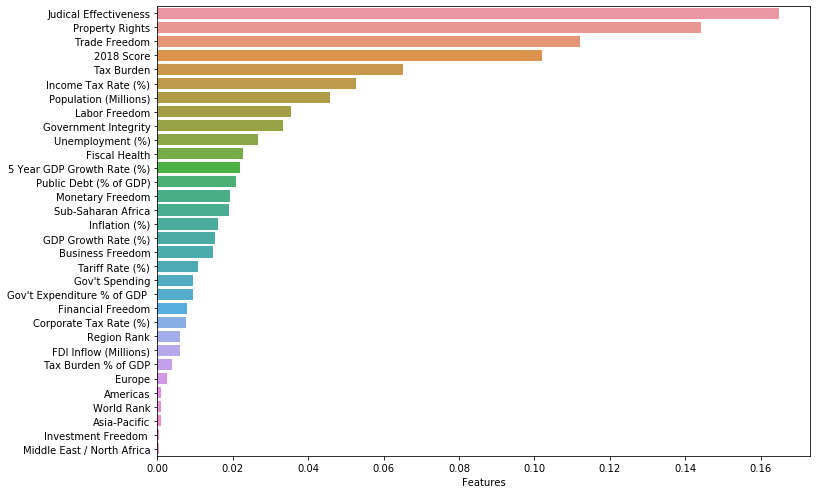

In [67]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.barplot(x='Features',y=importance_free_bbm.index,data=importance_free_bbm)

I want to measure economic freedom based on 12 quantitative and qualitative factors, grouped into four broad categories, or pillars, of economic freedom:

    1.- Rule of Law (property rights, government integrity, judicial effectiveness)
    2.- Government Size (government spending, tax burden, fiscal health)
    3.- Regulatory Efficiency (business freedom, labor freedom, monetary freedom)
    4.- Open Markets (trade freedom, investment freedom, financial freedom)

Each of the twelve economic freedoms within these categories is graded on a scale of 0 to 100. A country’s overall score is derived by averaging these twelve economic freedoms, with equal weight being given to each. More information on the grading and methodology can be found in the appendix.


Each of the twelve economic freedoms within these categories is graded on a scale of 0 to 100. A country’s overall score is derived by averaging these twelve economic freedoms, with equal weight being given to each.

Then I will make every of this freedoms.

In [68]:
gov_size    =   importance_free_bbm.loc["Gov't Expenditure % of GDP "]+ \
                importance_free_bbm.loc['Tax Burden % of GDP']        + \
                importance_free_bbm.loc['Fiscal Health']      
                
reg_efec    =   importance_free_bbm.loc['Business Freedom']           + \
                importance_free_bbm.loc['Labor Freedom']              + \
                importance_free_bbm.loc['Monetary Freedom']          
        
open_market =   importance_free_bbm.loc['Trade Freedom']              + \
                importance_free_bbm.loc['Investment Freedom ']        + \
                importance_free_bbm.loc['Financial Freedom']    
        
rule_of_law =   importance_free_bbm.loc['Property Rights']            + \
                importance_free_bbm.loc['Judical Effectiveness']      + \
                importance_free_bbm.loc['Government Integrity']  

In [69]:
importance_free_bbm.loc['Rule of Law']           = rule_of_law
importance_free_bbm.loc['Government Size']       = gov_size
importance_free_bbm.loc['Regulatory Efficiency'] = reg_efec
importance_free_bbm.loc['Open Markets']          = open_market  

In [70]:
importance_free_bbm.sort_values(by='Features',ascending=False)

,Features
Rule of Law,0.342425
Judical Effectiveness,0.164915
Property Rights,0.144144
Open Markets,0.120680
Trade Freedom,0.112228
2018 Score,0.102126
Regulatory Efficiency,0.069447
Tax Burden,0.065034
Income Tax Rate (%),0.052568
Population (Millions),0.045900


Seen that, let's see how much individual liberty can say about GDP per capita, let's sum freedom features and the property right.

In [71]:
liberty = reg_efec + open_market

In [72]:
liberty

Features    0.190127
dtype: float64

In [73]:
importance_free_bbm.loc['Liberty'] = rule_of_law

So now it's clear that the most important feature is the liberty, as it's showed in the following plot of the data shorter and used before.

Text(0.5, 1.0, 'Feature Importance')

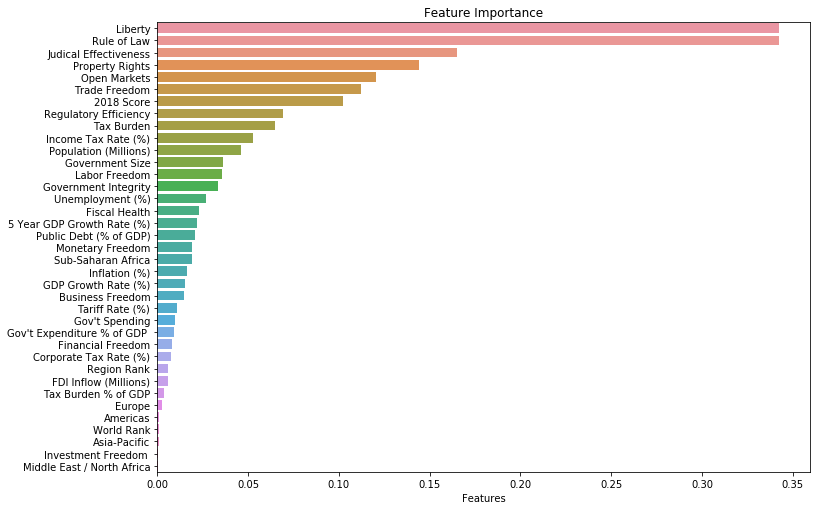

In [77]:
importance_free_bbm = importance_free_bbm.sort_values(by='Features',ascending=False)
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.barplot(x='Features',y=importance_free_bbm.index,data=importance_free_bbm)
plt.title('Feature Importance')

# Benchmarking the Model

## Random Forest - Economic Freedom Index

In [80]:
random_forest_freedom_mae,random_forest_freedom_mse = mape_mspe(freedom_bbm,free_X_train,free_X_test,free_y_train,free_y_test)
print('Random Forest - Economic Freedom Index')
print('Mean Absolute Error:')
print(random_forest_freedom_mae)
print('Mean Squared Error:')
print(random_forest_freedom_mse)

Random Forest - Economic Freedom Index
Mean Absolute Error:
104.88293356535716
Mean Squared Error:
85839.24789483611


## Decision Tree - Macro Economic Variable

In [81]:
tree = DecisionTreeRegressor()

In [82]:
tree_macro_mae,tree_macro_mse = mape_mspe(tree,X_train,X_test,y_train,y_test)
print('Decision Tree Black Box Model - Macro Economics')
print('Mean Absolute Error')
print(tree_macro_mae)
print('Mean Squared Error')
print(tree_macro_mse)

Decision Tree Black Box Model - Macro Economics
Mean Absolute Error
62.39347795136799
Mean Squared Error
7306.04011376815


## Decision Tree - Economic Freedom Index

In [83]:
tree_freedom_mae,tree_freedom_mse = mape_mspe(tree,free_X_train,free_X_test,free_y_train,free_y_test)
print('Decision Tree Black Box Model - Freedom Index')
print('Mean Absolute Error')
print(tree_freedom_mae)
print('Mean Squared Error')
print(tree_freedom_mse)

Decision Tree Black Box Model - Freedom Index
Mean Absolute Error
134.9166863408807
Mean Squared Error
422650.2181319565


# Evaluation

I will make a frame for compare each one easier

In [89]:
benchmark_dict = {'Mean Absolute Error':[random_forest_macro_mae,                                    
                                     random_forest_freedom_mae,                                     
                                     tree_macro_mae,                                     
                                     tree_freedom_mae,                                     
                                     ],
                  'Mean Squared Error':[random_forest_macro_mse,                                   
                                     random_forest_freedom_mse,                                   
                                     tree_macro_mse,                                     
                                     tree_freedom_mse,                                     
                                     ]
                 }
benchmark_data_frame = pd.DataFrame(data=benchmark_dict,
                                    index =['Random Forest - Macro',                                            
                                            'Random Forest - Freedom',                                           
                                            'Decision Tree - Macro',                                            
                                            'Decision Tree - Freedom'                                                                                        
                                           ]
                                    )
benchmark_data_frame.sort_values(by='Mean Squared Error',ascending=True)

,Mean Absolute Error,Mean Squared Error
Decision Tree - Macro,62.393478,7306.040114
Random Forest - Macro,81.843681,58041.140218
Random Forest - Freedom,104.882934,85839.247895
Decision Tree - Freedom,134.916686,422650.218132


Text(0.5, 1.0, 'Models Mean Absolute Error')

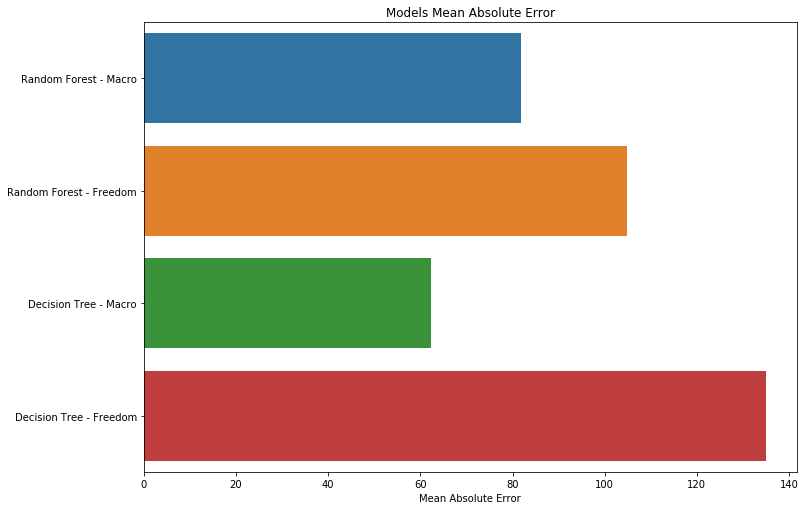

In [90]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.barplot(y= benchmark_data_frame.index,
            x = 'Mean Absolute Error',
            data=benchmark_data_frame)
plt.title('Models Mean Absolute Error')

Random Forest and Decision Tree with Macro Economic Variables are the best ones, and Random Forest seems a bit more worst only.

# Tuning with GridSearchCV

In [91]:
random_forest_parameters = {'n_estimators':[5,10,15,20,25],'max_depth':[None,4,6,8,10],'min_samples_split':[2,3,4,5]}
macro_regressor   = GridSearchCV(black_box_model, random_forest_parameters)
freedom_regressor = GridSearchCV(black_box_model, random_forest_parameters)

Scikit-learn GridSearchCV do the Cross Validation using kfold the standard is 3 folds. With Cross-Validation there are no need to create a evaluation data set split to tune the model and loss high amount of data, if this really small datasets cross-validation is a must.

In [92]:
#Scikit-learn GridSearchCV do the Cross Validation
#Selecting Kbest Features
macro_kbest = SelectKBest(k=10,score_func=mutual_info_regression)
macro_kbest.fit(df,gdp_per_capita)
macro_kbest_X = macro_kbest.transform(df)
macro_kbest_X_test = macro_kbest.transform(X_test)
#Grid Seach of RandomForest Macro economics Features Model
macro_regressor.fit(macro_kbest_X,gdp_per_capita)
#PCA Transformation
freedom_pca = decomposition.PCA(n_components=6)
freedom_pca.fit(freedom)
freedom_pca_X = freedom_pca.transform(freedom)
freedom_pca_X_test = freedom_pca.transform(free_X_test)
#Grid Seach of RandomForest Freedom Index Model
freedom_regressor.fit(freedom_pca_X,GDP_freedom)

/home/goldenfox/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/goldenfox/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/goldenfox/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [None, 4, 6, 8, 1

In [93]:
macro_regressor.get_params()

{'cv': 'warn',
 'error_score': 'raise-deprecating',
 'estimator__bootstrap': True,
 'estimator__criterion': 'mse',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 10,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_

In [94]:
freedom_regressor.get_params()

{'cv': 'warn',
 'error_score': 'raise-deprecating',
 'estimator__bootstrap': True,
 'estimator__criterion': 'mse',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 10,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_

### Macro Variables

In [95]:
macro_predictions = macro_regressor.predict(macro_kbest_X_test)
macro_predictions = pd.DataFrame(macro_predictions,index=y_test.index)
macro_predictions.columns = ['Predictions']
macro_benchark = pd.concat([macro_predictions,y_test],axis=1)
macro_benchmark['% of error'] = (macro_benchmark['Predictions'] - macro_benchmark['GDP per capita (current US$)'])/(macro_benchmark['GDP per capita (current US$)']/100)
print('Random Forest Macro Economics Features Model')
print('Mean Absolute Error')
freedom_mae = macro_benchmark['% of error'].abs().mean()
print(freedom_mae)
print('Mean Squared Error')
freedom_mse = (macro_benchmark['% of error']**2).mean()
print((macro_benchmark['% of error']**2).mean())

NameError: name 'macro_benchmark' is not defined

# Prediction of GDP

In [96]:
freedom_predictions = freedom_regressor.predict(freedom_pca_X_test)
freedom_predictions = pd.DataFrame(macro_predictions,index=free_y_test.index)
freedom_predictions.columns = ['Predictions']
freedom_benchmark = pd.concat([freedom_predictions,free_y_test],axis=1)
freedom_benchmark['% of error'] = (freedom_benchmark['Predictions'] - freedom_benchmark['GDP per Capita (PPP)'])/(freedom_benchmark['GDP per Capita (PPP)']/100)
print('RandomForest Economic Freedom Features Model')
print('Mean Absolute Error')
freedom_mae = freedom_benchmark['% of error'].abs().mean()
print(freedom_mae)
print('Mean Squared Error')
freedom_mse = (freedom_benchmark['% of error']**2).mean()
print((freedom_benchmark['% of error']**2).mean())

RandomForest Economic Freedom Features Model
Mean Absolute Error
292.17504571712783
Mean Squared Error
326276.8457784072


This model act poorly even with tuning, let use more data. The Heritage Foundation have data from 2013 to 2018. Let clean it and use then all.

In [97]:
freedom_13 = pd.read_excel('input/heritage-freedom-index/index2013_data.xls')
freedom_14 = pd.read_excel('input/heritage-freedom-index/index2014_data.xls')
freedom_15 = pd.read_excel('input/heritage-freedom-index/index2015_data.xls')
freedom_16 = pd.read_excel('input/heritage-freedom-index/index2016_data.xls')
freedom_17 = pd.read_excel('input/heritage-freedom-index/index2017_data.xls')

Cleaning the data droping useless columns.

In [98]:
columns = [0,1,2,7,9,11,13,15,17,19,21,23,25,27,33,35]
freedom_13.drop(freedom_13.columns[columns], axis=1, inplace=True)
freedom_14.drop(freedom_14.columns[columns], axis=1, inplace=True)
freedom_15.drop(freedom_15.columns[columns], axis=1, inplace=True)
freedom_16.drop(freedom_16.columns[columns], axis=1, inplace=True)
freedom_17.drop(freedom_17.columns[[0,1,2,24,26]], axis = 1, inplace=True)

In [99]:
freedom_17.drop('Judical Effectiveness', axis=1, inplace=True)

freedom.drop('Judical Effectiveness', axis=1, inplace=True)

freedom_17.drop('Tax Burden', axis=1, inplace=True)

freedom.drop('Tax Burden', axis=1, inplace=True)

Some have features change the name.

In [100]:
freedom.rename(columns={'Government Integrity': 'Freedom from Corruption', 'Fiscal Health': 'Fiscal Freedom '}, inplace=True)
freedom_17.rename(columns={'Government Integrity': 'Freedom from Corruption', 'Fiscal Health': 'Fiscal Freedom '}, inplace=True)

In [101]:
freedom.rename(columns={'Government Integrity': 'Freedom from Corruption', 'Fiscal Health': 'Fiscal Freedom '}, inplace=True)
freedom_17.rename(columns={'Government Integrity': 'Freedom from Corruption', 'Fiscal Health': 'Fiscal Freedom '}, inplace=True)

In [102]:
freedom_index = pd.concat([freedom_13,freedom_14,freedom_15,freedom_16,freedom_17],axis=0)

/home/goldenfox/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [103]:
freedom_index_region = pd.get_dummies(freedom_index['Region'])
freedom_index = pd.concat([freedom_index,freedom_index_region], axis=1)
freedom_index

,2013 Score,2014 Score,2015 Score,2016 Score,2017 Score,5 Year GDP Growth Rate (%),Business Freedom,Corporate Tax Rate (%),FDI Inflow (Millions),Financial Freedom,...,Trade Freedom,Unemployment (%),World Rank,Americas,Asia-Pacific,Europe,Middle East / North Africa,North America,South and Central America / Caribbean,Sub-Saharan Africa
0,NaN,NaN,NaN,NaN,NaN,10.3354,59.7,20.0,83.411455,NaN,...,NaN,NaN,NaN,0,1,0,0,0,0,0
1,65.2,NaN,NaN,NaN,NaN,4.43142,81.0,10.0,1031.362818,70.0,...,79.80,13.5,58.0,0,0,1,0,0,0,0
2,49.6,NaN,NaN,NaN,NaN,2.71859,65.2,25.0,2571.000000,30.0,...,67.80,10,145.0,0,0,0,1,0,0,0
3,47.3,NaN,NaN,NaN,NaN,8.84881,43.1,35.0,-5585.529270,40.0,...,70.20,NaN,158.0,0,0,0,0,0,0,1
4,46.7,NaN,NaN,NaN,NaN,6.81178,60.1,35.0,7243.148181,30.0,...,67.60,7.2,160.0,0,0,0,0,0,1,0
5,69.4,NaN,NaN,NaN,NaN,2.16783,87.6,20.0,524.628000,70.0,...,85.40,5.9,38.0,0,0,1,0,0,0,0
6,82.6,NaN,NaN,NaN,NaN,2.61988,95.5,30.0,41316.687692,90.0,...,86.20,5.1,3.0,0,1,0,0,0,0,0
7,71.8,NaN,NaN,NaN,NaN,1.30634,73.6,25.0,14127.934052,70.0,...,86.80,4.5,25.0,0,0,1,0,0,0,0
8,59.7,NaN,NaN,NaN,NaN,9.72302,69.2,20.0,1465.000000,40.0,...,77.20,1,88.0,0,1,0,0,0,0,0
9,70.1,NaN,NaN,NaN,NaN,-0.496504,71.3,0.0,1533.270000,70.0,...,47.00,13.7,35.0,0,0,0,0,0,1,0


In [104]:
freedom_index.drop('Region', axis=1, inplace=True)

In [105]:
freedom_index.dropna(inplace=True)

In [106]:
freedom_index = freedom_index.apply(pd.to_numeric, errors='ignore')
freedom_index.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 37 columns):
2013 Score                               0 non-null float64
2014 Score                               0 non-null float64
2015 Score                               0 non-null float64
2016 Score                               0 non-null float64
2017 Score                               0 non-null float64
5 Year GDP Growth Rate (%)               0 non-null object
Business Freedom                         0 non-null float64
Corporate Tax Rate (%)                   0 non-null float64
FDI Inflow (Millions)                    0 non-null float64
Financial Freedom                        0 non-null float64
Fiscal Freedom                           0 non-null float64
Freedom from Corruption                  0 non-null float64
GDP Growth Rate (%)                      0 non-null object
GDP per Capita (PPP)                     0 non-null object
Gov't Expenditure % of GDP               0 non-null float64
Gov't Spen

# Predictions

In [107]:
GDP_freedom_index = freedom_index['GDP per Capita (PPP)']
freedom_index.drop('GDP per Capita (PPP)', axis=1, inplace=True)

In [108]:
freedom_index_X_train, freedom_index_X_test, freedom_index_y_train, freedom_index_y_test = train_test_split(freedom_index, GDP_freedom_index, test_size=0.33, random_state=42)

ValueError: With n_samples=0, test_size=0.33 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [155]:
index_regressor = GridSearchCV(tree, tree_parameters)

NameError: name 'tree_parameters' is not defined

In [156]:
freedom_index_mae,freedom_index_mse = mape_mspe(tree,freedom_index_X_train,freedom_index_X_test,freedom_index_y_train,freedom_index_y_test)
print('Decision Tree - Economic Freedom Index')
print('Mean Absolute Error:')
print(freedom_index_mae)
print('Mean Squared Error:')
print(freedom_index_mse)

NameError: name 'freedom_index_X_train' is not defined

In [157]:
#Scikit-learn GridSearchCV do the Cross Validation
#GridSearch
index_regressor.fit(freedom_index,GDP_freedom_index)

NameError: name 'index_regressor' is not defined

In [158]:
index_predictions = index_regressor.predict(freedom_index_X_test)
index_predictions = pd.DataFrame(index_predictions,index=freedom_index_y_test.index)
index_predictions.columns = ['Predictions']
index_benchmark = pd.concat([index_predictions,freedom_index_y_test],axis=1)
index_benchmark['% of error'] = (index_benchmark['Predictions'] - index_benchmark['GDP per Capita (PPP)'])/(index_benchmark['GDP per Capita (PPP)']/100)
print('Decision Tree Freedom Index Model')
print('Mean Absolute Error')
freedom_index_mae = index_benchmark['% of error'].abs().mean()
print(freedom_index_mae)
print('Mean Squared Error')
freedom_index_mse = (index_benchmark['% of error']**2).mean()
print(freedom_index_mse)

NameError: name 'index_regressor' is not defined